<h1>Box Cox Transformer</h1>


<h3>
Behind the scenes techniques:</h3>
    => Maximum Likelihood <br>
    => Bayesian statistics <br>
    
<h3>Limitations</h3>
=> Applicable only to values > 0 <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('../datasets/concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<h2> We see that the data has value 0 which means we cannot apply Box-Cox transformer directly.</h2>


<h2> Training a linear algorithm without any transformation</h2>

In [8]:
X = df.drop('Strength', axis=1)
y = df['Strength']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.570114265275778

In [12]:
lr = LinearRegression()

np.mean(cross_val_score(lr, X, y, scoring='r2',cv=10))

0.27820729160873753

<h2> Extremely low score without transformation </h2>


<h2>Applying transformation</h2>

In [17]:
pt = PowerTransformer(method = 'box-cox')

X_train_transform = pt.fit_transform(X_train+0.0001)
X_test_transform = pt.transform(X_test+0.0001)


lr = LinearRegression()

lr.fit(X_train_transform, y_train)

y_pred = lr.predict(X_test_transform)
score = r2_score(y_test, y_pred)
score

0.7786725362442212

<h2>Getting the lambda values</h2>

In [31]:
print("Lamda values: ", pt.lambdas_)

Lamda values:  [ 1.77897922e-01 -8.95266364e-04 -1.53526154e-01  7.45285912e-01
  2.48528825e-01  1.01258335e+00  1.99356923e+00 -1.90666197e-02]


<h2> We are adding 0.0001 for the Box-cox transform to work but this neglible addition will not affect the performance</h2>

In [19]:
pt = PowerTransformer(method = 'box-cox')
X_transform = pt.fit_transform(X+0.0001)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_transform, y, scoring='r2',cv=10))

0.6482082304075789

<h2> As we can see, the power transformer has done its work and the r2 score has improved drastically.</h2>


<h2> Let's now visualize through density plot and QQ plot</h2>

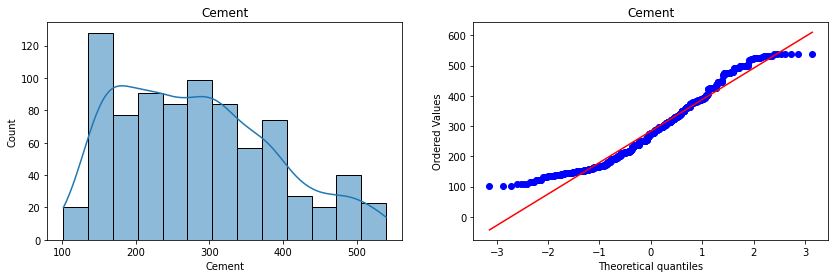

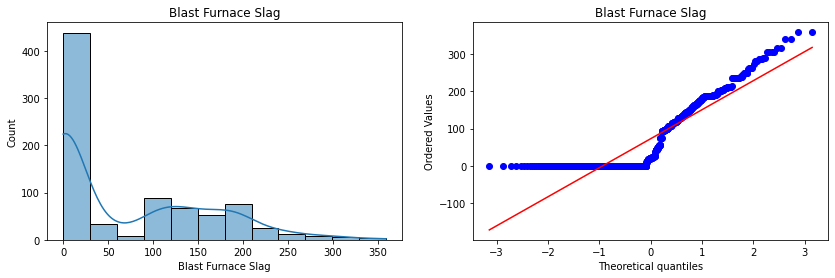

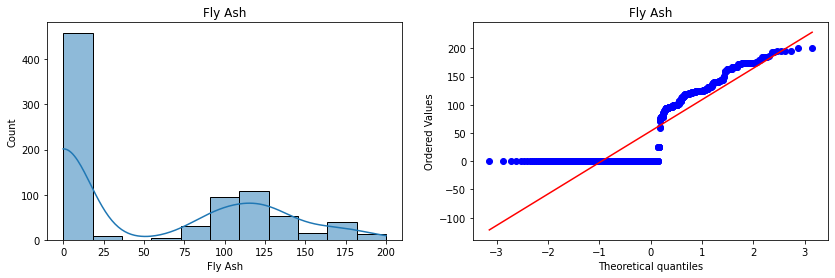

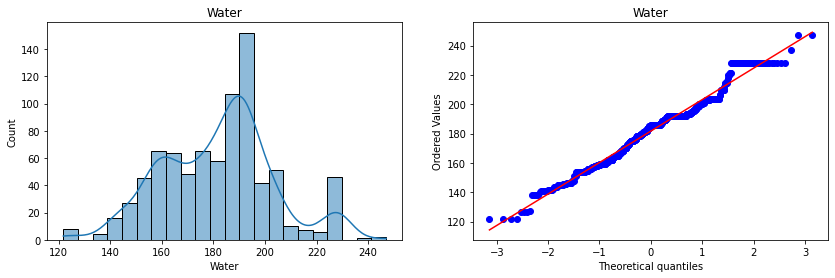

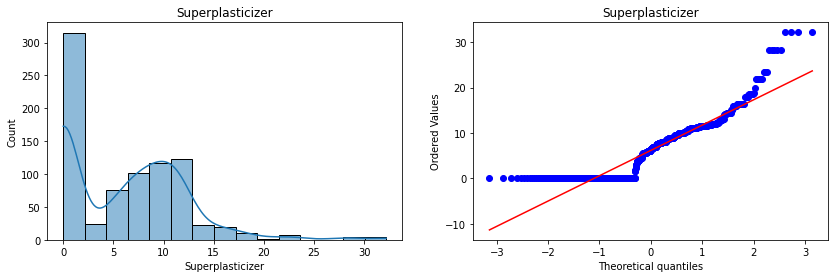

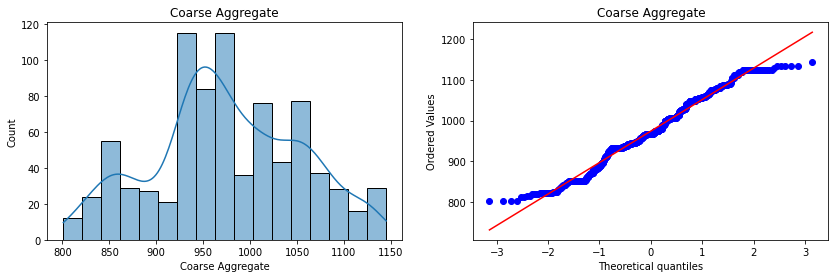

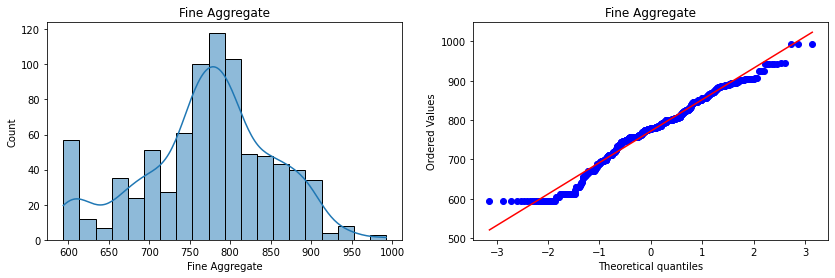

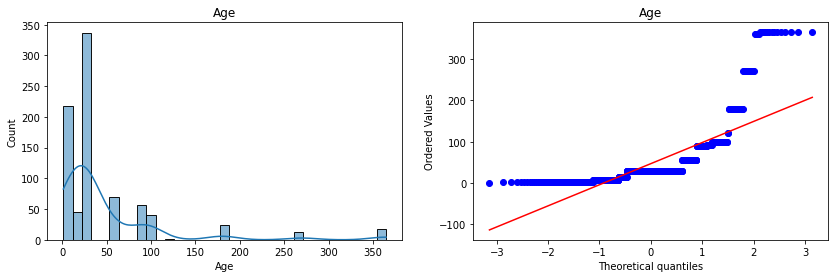

In [21]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data=X_train,x=X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

<h2> Most of the features are not even close to gaussian like. </h2>

<h2>Lets visualize after applying transformation</h2>

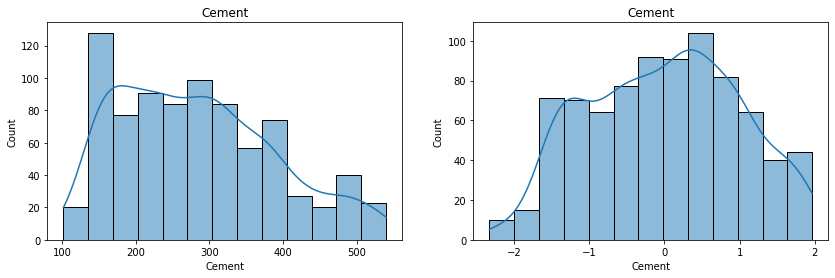

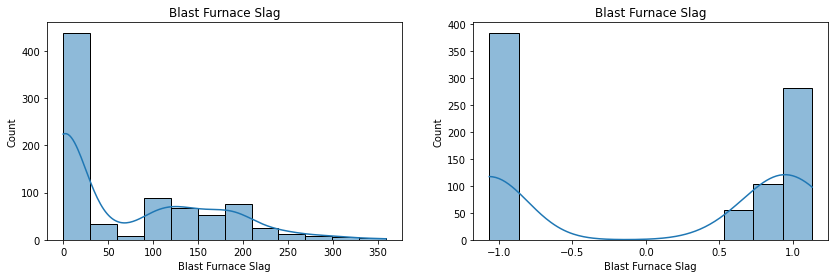

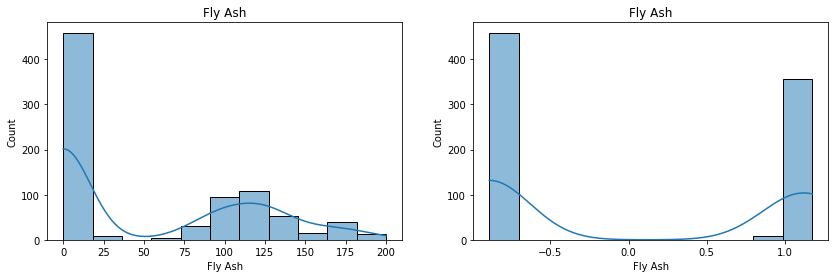

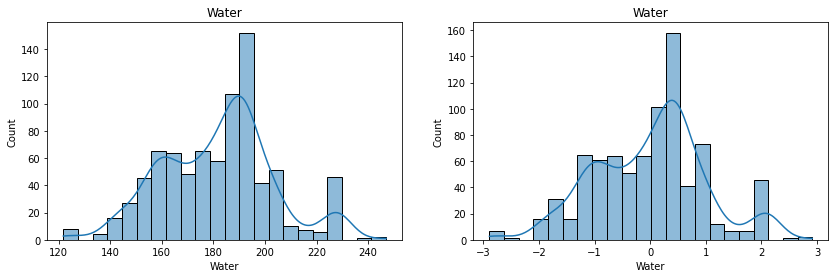

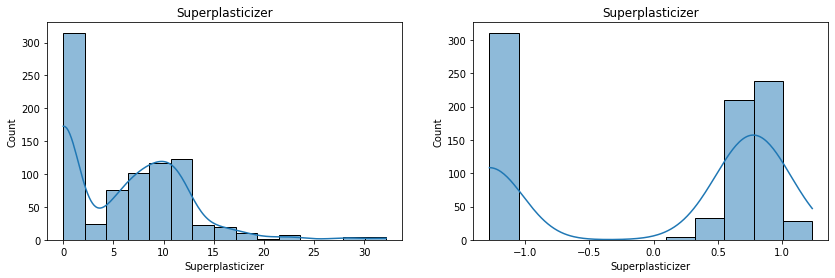

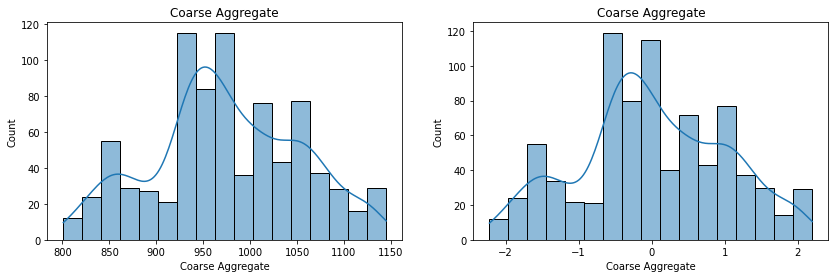

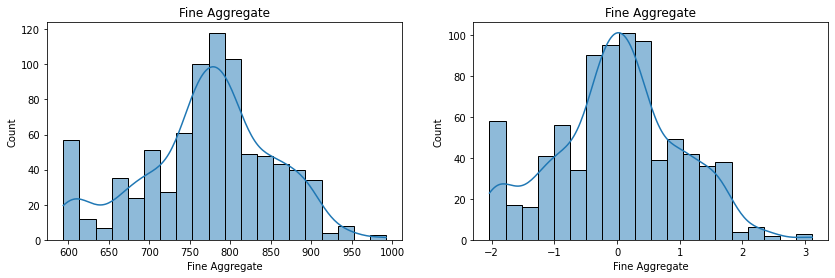

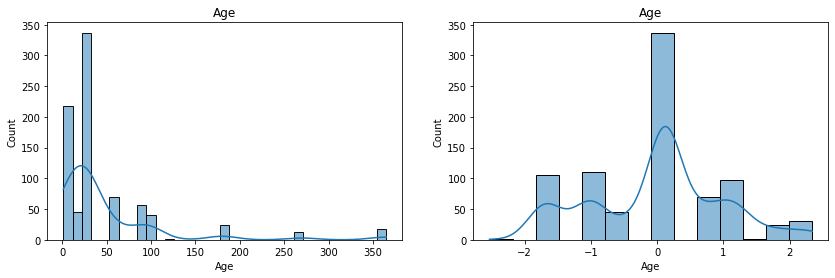

In [25]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.0001)
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data=X_train,x=X_train[col],kde=True)
    plt.title(col)
    
    
    plt.subplot(122)
    sns.histplot(data=X_train_transformed,x=X_train_transformed[col],kde=True)
    plt.title(col)

    plt.show()

<h2> The feature 'Age' has best transformation</h2>

<h2> Let's now try the Yeo-Johnson transformer</h2>

In [26]:
#The default method is Yeo-Johnson
pt = PowerTransformer()

X_train_transform = pt.fit_transform(X_train)
X_test_transform = pt.transform(X_test)


lr = LinearRegression()

lr.fit(X_train_transform, y_train)

y_pred = lr.predict(X_test_transform)
score = r2_score(y_test, y_pred)
score

0.7774915803540878

In [32]:
print("Lamda values: ", pt.lambdas_)

Lamda values:  [ 1.77897922e-01 -8.95266364e-04 -1.53526154e-01  7.45285912e-01
  2.48528825e-01  1.01258335e+00  1.99356923e+00 -1.90666197e-02]


<h3> We do not add 0.0001 here as Yeo-Johnson works with 0 and negative data</h3>

In [27]:
pt = PowerTransformer()
X_transform = pt.fit_transform(X)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_transform, y, scoring='r2',cv=10))

0.6586548624046112

<h2>Yeo-Johnson has performed much better than box-cox</h2>

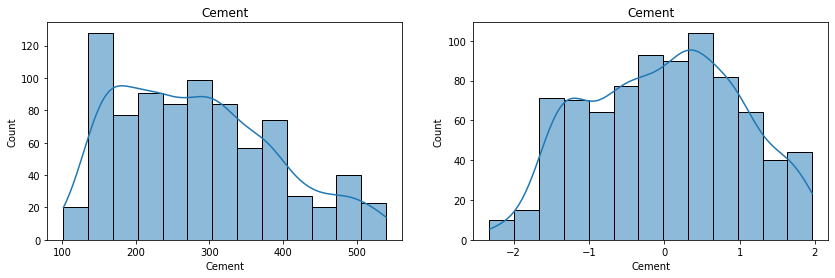

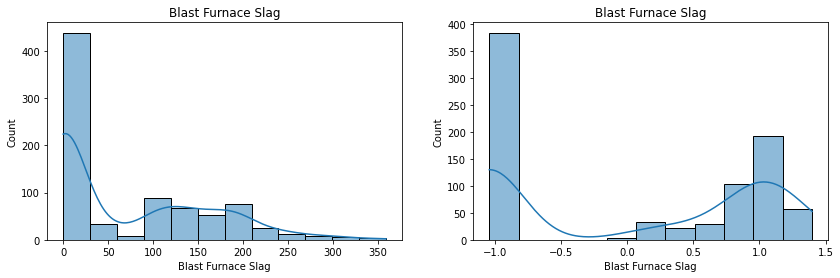

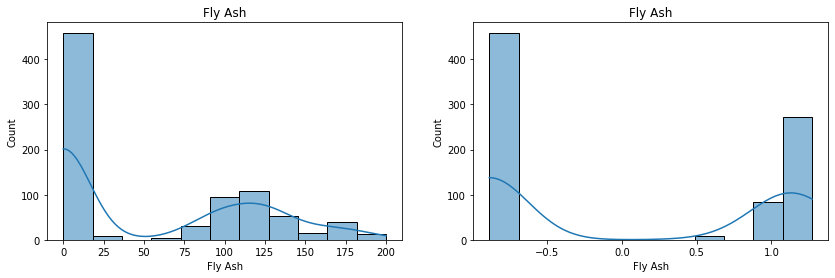

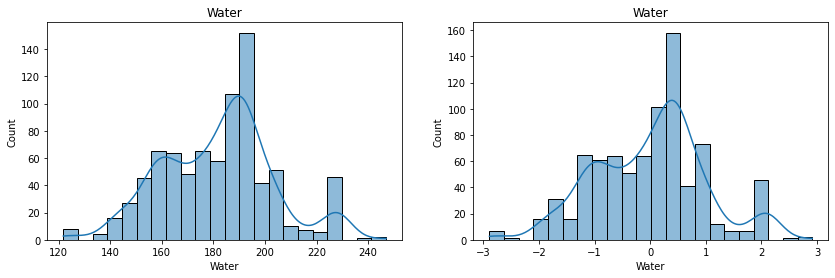

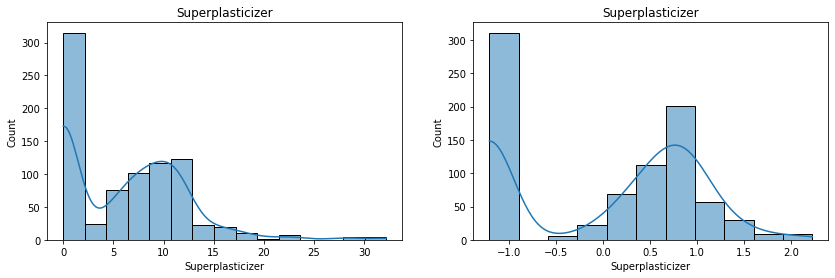

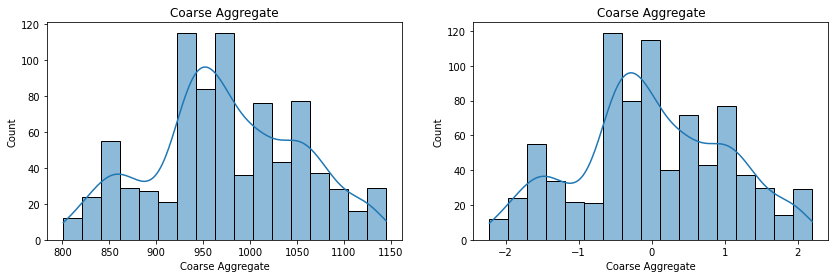

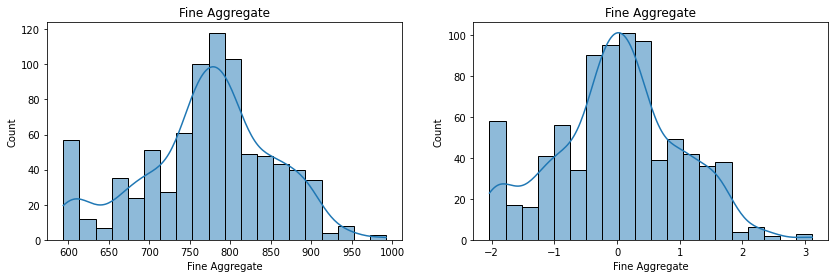

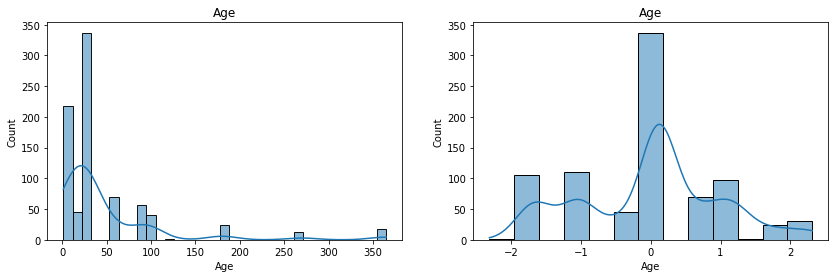

In [28]:
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data=X_train,x=X_train[col],kde=True)
    plt.title(col)
    
    
    plt.subplot(122)
    sns.histplot(data=X_train_transformed,x=X_train_transformed[col],kde=True)
    plt.title(col)

    plt.show()